<a href="https://colab.research.google.com/github/JyotiChiluka/Netflix-Movies-And-TV-Shows_Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Importing Libraries**

In [233]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

import collections
from plotly.offline import init_notebook_mode, iplot
import random
from datetime import datetime
import time
import dateutil

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

%matplotlib inline


In [4]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Reading the Data**

In [234]:
#Reading a data file
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [235]:
#It gives top 5 rows of dataset 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [236]:
#It gives last 5 rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [237]:
#It gives Total number of rows and columns of dataset
df.shape

(7787, 12)

Dataset contain 7787 rows and 11 columns

In [238]:
#It gives some basic statistical details like percentile, mean, std, max etc.
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [239]:
#It gives total columns, data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#**Data cleaning**

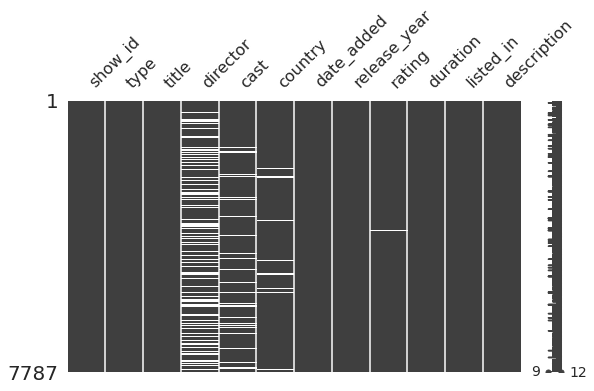

In [240]:
#Plot the null values present in the dataset
msno.matrix(df,figsize=[9,5])

director and cast contains large number of null values so we will drop it

In [241]:
#Dropping irrelevent features 
df.drop(['director','cast'],axis=1, inplace=True)

In [242]:
#Value counts of type feature
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [243]:
#Looking nan values on data_added 
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


There are 10 nan values in date_added column so we drop those 10 rows 

In [244]:
#Removing nan values
df = df[df['date_added'].notna()]
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [245]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [246]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


#**Exploratory Data Analysis**

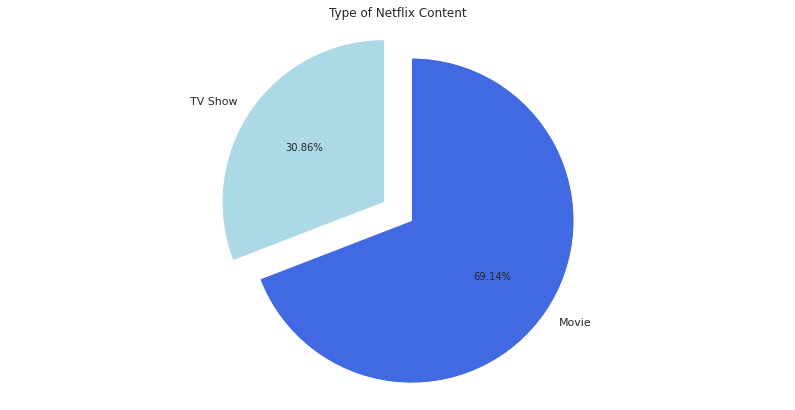

In [247]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [248]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [249]:
#Plotting different content over the years 
#percent of total content
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

#percent of Tv show 
df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))

#percent of Movie
df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))


t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="royalblue"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="red"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


**By analysing the above plot we get know that in recent years netflix is focusing movies than TV shows (movies is increased by 80% and TV shows is increased by 73% compare to 2016 data)**

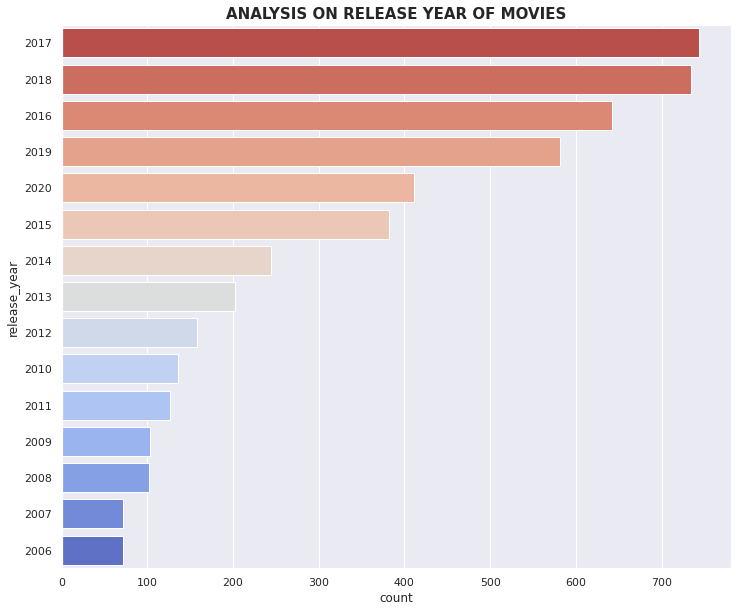

In [250]:
#Plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm_r", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

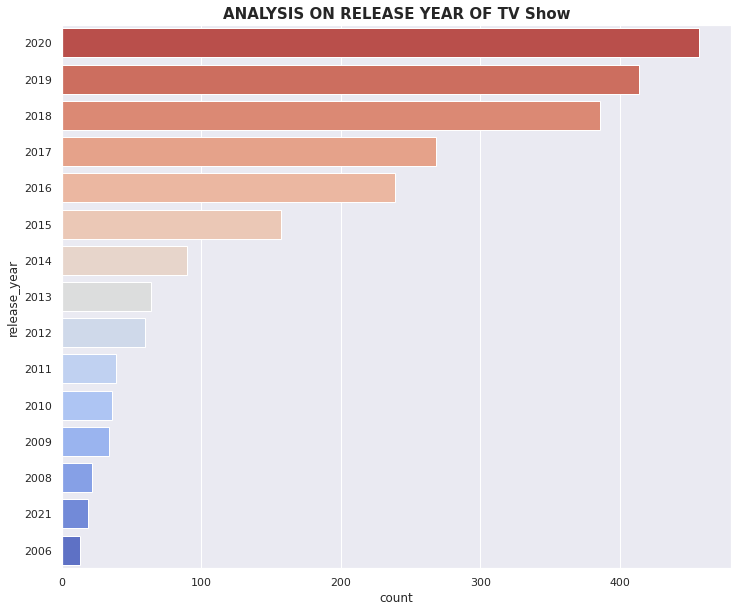

In [251]:
#Plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm_r", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

In [252]:
df['country'].value_counts().head(10)

United States     2549
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: country, dtype: int64

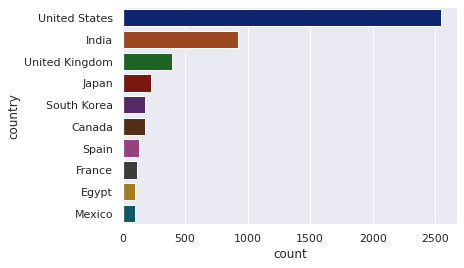

In [253]:
#Plotting countplot of country 
sns.countplot(y ='country', data = df , palette="dark", order=df['country'].value_counts().index[0:10] )

**United states have the most number of content and then india and so on**

In [254]:
df_tv.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019
16,s17,TV Show,Feb-09,NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019


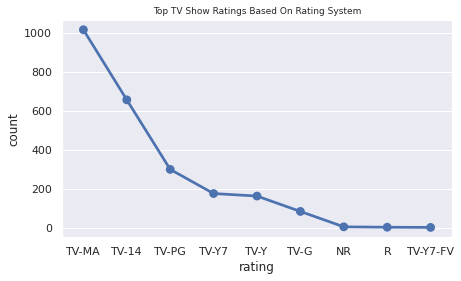

In [255]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='9')
plt.show()

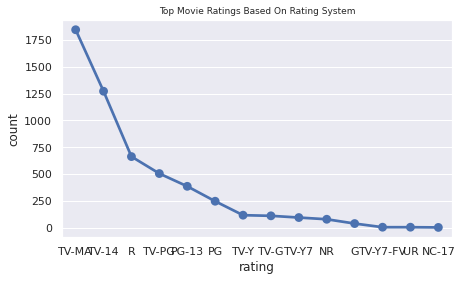

In [256]:
#Pointplot on top movie ratings
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='9')
plt.show()

In [257]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [258]:
#Plotting content over the years
col = 'listed_in'
categories = ", ".join(df['listed_in']).split(", ")
counter_list = collections.Counter(categories).most_common(70)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV shows", marker=dict(color="red"))

data = [trace1]
layout = go.Layout(title="count of each Content ", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()
fig = plt.figure(figsize=(30,15))

plt.show()

<Figure size 2160x1080 with 0 Axes>

Creating new features from date added

In [259]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [260]:
df["month"]=df['date_added'].str.split(' ').str[0]
df['month']

0          August
1        December
2        December
3        November
4         January
          ...    
7782      October
7783        March
7784    September
7785      October
7786        March
Name: month, Length: 7777, dtype: object

In [261]:
month_df=df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,Count
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


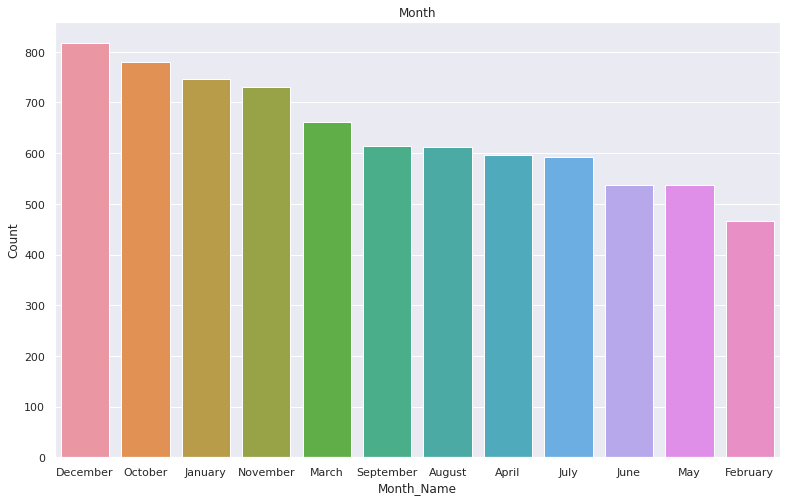

In [262]:
#Content added monthwise
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=ab)

**Here we can say that, In netflix maximum content added in December and minimum in february**

**Content available in different countries**

In [263]:
#Content avaliable in different countries
ab = df.groupby('type')['country'].value_counts()


In [264]:
#Type movie available in different countries
print(ab.head(60))

type   country                      
Movie  United States                    1850
       India                             852
       United Kingdom                    193
       Canada                            118
       Egypt                              89
       Spain                              89
       Turkey                             73
       Philippines                        70
       France                             69
       Japan                              69
       Indonesia                          68
       Mexico                             65
       Nigeria                            62
       United Kingdom, United States      52
       Hong Kong                          49
       Brazil                             46
       Germany                            42
       United States, Canada              38
       Australia                          37
       South Korea                        36
       Thailand                           35
       Argentina  

In [265]:
#TV show available in different countries
print(ab.tail(60))

type     country                                                   
TV Show  Mauritius, South Africa                                       1
         Mexico, Spain                                                 1
         Mexico, United States, Spain, Colombia                        1
         Netherlands, Germany, Italy, Canada                           1
         Norway, Denmark                                               1
         Norway, Germany, Sweden                                       1
         Norway, Sweden                                                1
         Norway, United States                                         1
         Philippines                                                   1
         Puerto Rico, United States, Colombia                          1
         Saudi Arabia, Syria, Egypt, Lebanon, Kuwait                   1
         Senegal                                                       1
         Singapore, United States                       

#**Data preprocessing**

In [266]:
#df[['listed_in','description']]
df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [267]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

**Removing punctuations**

In [268]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [269]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,2020,January


**Removing stop words**

In [270]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [271]:
# Extracting the stopwords from nltk library
sw = stopwords.words('english')
# Displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [272]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [273]:
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [274]:
df['description'] = df['description'].apply(stopwords)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2020,January


**Top words before stemming**

**Collect vocabulary count**

In [275]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

### Store the vocab and counts in a pandas dataframe

In [276]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [277]:
vocab_bef_stem

şeref        19593
ōarai        19592
łukasz       19591
überelite    19590
über         19589
             ...  
1000             4
100              3
10               2
009              1
007              0
Length: 19594, dtype: int64

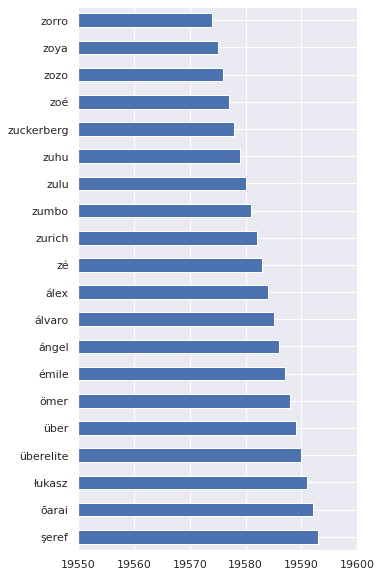

In [278]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19550, 19600))

**A funtion to carry out stemming operation**

In [279]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 


**Apply the function to each examples**

In [280]:
#Stemming for description
df['description'] = df['description'].apply(stemming)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,January


**Top words after stemming operation**

**Collect vocabulary count**

In [281]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

**Bar plot of top words after stemming**

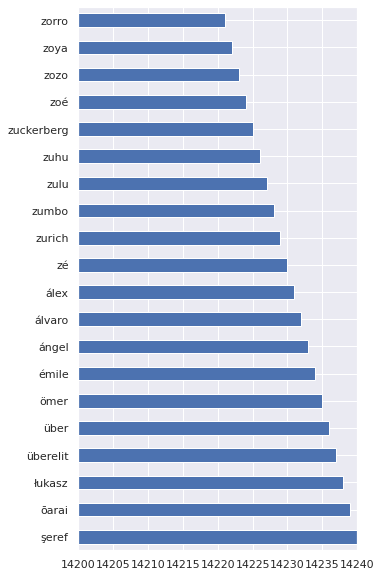

In [232]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# Plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (14200, 14240))

In [282]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [283]:
df['length'] = df['description'].apply(length)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month,length
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,November,89
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,January,99


**Repeating same procedure for listed_in**

In [284]:
#Remove punctuation for listed_in
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

In [285]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply(stopwords)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month,length
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movies international movies,armi recruit found dead fellow soldier forc co...,2018,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventure independent movies scifi fantasy,postapocalypt world ragdol robot hide fear dan...,2017,November,89
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,dramas,brilliant group student becom cardcount expert...,2020,January,99


In [286]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# Fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()


In [287]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [288]:
vocab_bef_stem

tv                 41
thrillers          40
teen               39
talk               38
standup            37
sports             36
spirituality       35
spanishlanguage    34
shows              33
series             32
scifi              31
science            30
romantic           29
reality            28
nature             27
mysteries          26
musicals           25
music              24
movies             23
lgbtq              22
korean             21
kids               20
international      19
independent        18
horror             17
features           16
fantasy            15
family             14
faith              13
dramas             12
docuseries         11
documentaries      10
cult                9
crime               8
comedy              7
comedies            6
classic             5
children            4
british             3
anime               2
adventure           1
action              0
dtype: int64

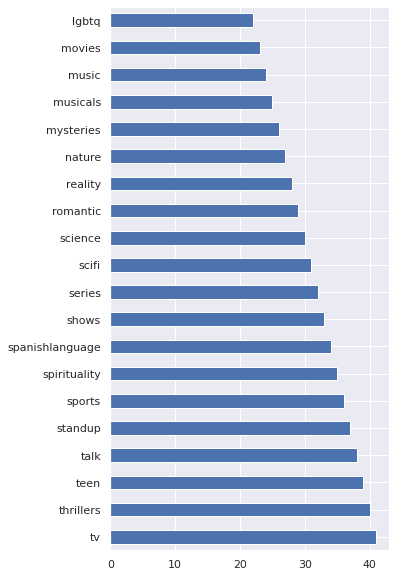

In [289]:
#Plotting top words
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))


In [290]:
# Stemming for listed_in
df['listed_in'] = df['listed_in'].apply(stemming)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month,length
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017,November,89
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,2020,January,99


In [291]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary_listed_in = tfid_vectorizer.vocabulary_.items()

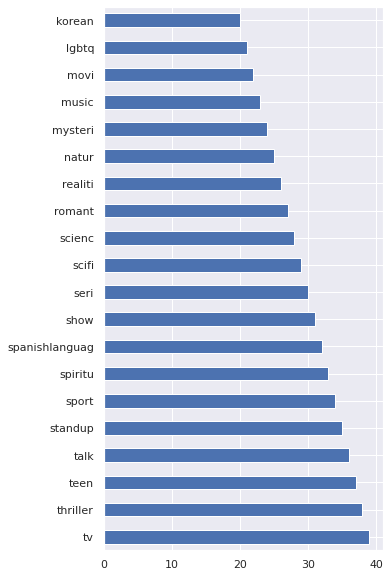

In [292]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# Plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [293]:
df['length_listed'] = df['listed_in'].apply(length)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month,length,length_listed
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,December,102,23
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017,November,89,43
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,drama,brilliant group student becom cardcount expert...,2020,January,99,5


In [294]:
df[['description','listed_in']]

,description,listed_in
0,futur elit inhabit island paradis far crowd sl...,intern tv show tv drama tv scifi fantasi
1,devast earthquak hit mexico citi trap survivor...,drama intern movi
2,armi recruit found dead fellow soldier forc co...,horror movi intern movi
3,postapocalypt world ragdol robot hide fear dan...,action adventur independ movi scifi fantasi
4,brilliant group student becom cardcount expert...,drama
...,...,...
7782,lebanon civil war depriv zozo famili hes left ...,drama intern movi
7783,scrappi poor boy worm way tycoon dysfunct fami...,drama intern movi music music
7784,documentari south african rapper nasti c hit s...,documentari intern movi music music
7785,dessert wizard adriano zumbo look next “willi ...,intern tv show realiti tv
